 ## <center> AIML MODULE PROJECT - PART III

In [50]:
#Import the packages
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### 1. Data warehouse:
<b>• Read the CSV file.

In [29]:
#Load the dataset
data= pd.read_csv(r"D:\LEARNING\Great Learning\PGP- AI ML\COURSES\APPLIED STATISTICS\PROJECT\DS - Part3 - CompanyX_EU.csv")

In [30]:
print(data.shape)
data.head()

(662, 6)


,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


### 2. Data exploration:
 <b> • Check the datatypes of each attribute.


In [31]:
data.dtypes

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

<b>• Check for null values in the attributes.

In [32]:
data.isna().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

### 3. Data preprocessing & visualisation:
<b>• Drop the null values

In [33]:
data = data.dropna(axis = 0, how ='any')

<b>• Convert the ‘Funding’ features to a numerical value.

In [34]:
#Derive a new column called funding multiplier
data['Funding_multiplier'] = data['Funding'].apply(lambda x:x[-1])

In [35]:
data['Funding_multiplier'].value_counts()

M    309
K    136
B      1
Name: Funding_multiplier, dtype: int64

In [37]:
#Removing the $,K,M,B Symbol
symbols = ['$','K','M','B']
for ch in symbols:
    data['Funding'] = data['Funding'].str.replace(ch,"")
data.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funding_multiplier
1,3DLT,3dlt.com,630,Disrupt NYC 2013,Contestant,Closed,K
3,3Dprintler,3dprintler.com,1,Disrupt NY 2016,Audience choice,Operating,M
5,5to1,5to1.com,19.3,TC50 2009,Contestant,Acquired,M
6,8 Securities,8securities.com,29,Disrupt Beijing 2011,Finalist,Operating,M
10,AdhereTech,adheretech.com,1.8,Hardware Battlefield 2014,Contestant,Operating,M


In [43]:
#convert funding to float
data['Funding'] = data['Funding'].astype(float)

In [48]:
def fund_multiplier(Funding_multiplier,Funding):
    if Funding_multiplier =='K':
        new_fund = Funding*pow(10,3)
    elif Funding_multiplier =='M':
        new_fund = Funding*pow(10,6)
    elif Funding_multiplier =='B':
        new_fund = Funding*pow(10,9)  
        
    return new_fund
        

data["New_Funding"] = data[["Funding_multiplier", "Funding"]].apply(lambda x : fund_multiplier(*x), axis=1)

In [51]:
data.rename(columns={'Funding':'Old_Funding','New_Funding':'Funding'},inplace=True)
data.head()

,Startup,Product,Old_Funding,Event,Result,OperatingState,Funding_multiplier,Funding
1,3DLT,3dlt.com,630.0,Disrupt NYC 2013,Contestant,Closed,K,630000.0
3,3Dprintler,3dprintler.com,1.0,Disrupt NY 2016,Audience choice,Operating,M,1000000.0
5,5to1,5to1.com,19.3,TC50 2009,Contestant,Acquired,M,19300000.0
6,8 Securities,8securities.com,29.0,Disrupt Beijing 2011,Finalist,Operating,M,29000000.0
10,AdhereTech,adheretech.com,1.8,Hardware Battlefield 2014,Contestant,Operating,M,1800000.0


<b>• Plot box plot for funds in million.

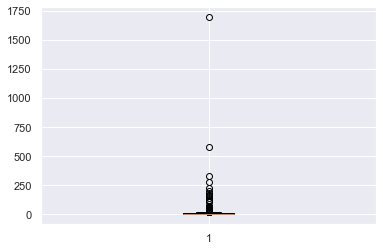

In [89]:
data["Funding_million"] = data["Funding"]/(pow(10,6))
B = plt.boxplot(data["Funding_million"])

<b>• Get the lower fence from the box plot.

In [90]:
[item.get_ydata() for item in B['whiskers']]

[array([0.74525, 0.005  ]), array([ 9.475, 22.   ])]

In [77]:
median = np.median(data["Funding_million"])
upper_quartile = np.percentile(data["Funding_million"], 75)
lower_quartile = np.percentile(data["Funding_million"], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = data["Funding_million"][data["Funding_million"]<=upper_quartile+1.5*iqr].max()
lower_whisker = data["Funding_million"][data["Funding_million"]>=lower_quartile-1.5*iqr].min()

In [93]:
print("median :" ,median)
print("upper_quartile :",upper_quartile)
print("lower_quartile :",lower_quartile)
print("iqr :",iqr)
print("upper_whisker :",upper_whisker)
print("lower_whisker :",lower_whisker)

median : 2.2
upper_quartile : 9.475
lower_quartile : 0.74525
iqr : 8.72975
upper_whisker : 22.0
lower_whisker : 0.005


<b>• Check number of outliers greater than upper fence.

In [97]:
data[data["Funding_million"]>upper_whisker].shape[0]

60

<b> • Drop the values that are greater than upper fence.

In [105]:
data1 = data[data["Funding_million"]<=upper_whisker]

<b>• Plot the box plot after dropping the values.

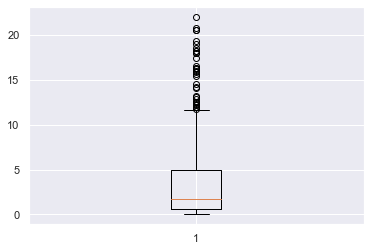

In [106]:
B = plt.boxplot(data1["Funding_million"])

<b>• Check frequency of the OperatingState features classes.

Operating    275
Closed        56
Acquired      55
Name: OperatingState, dtype: int64

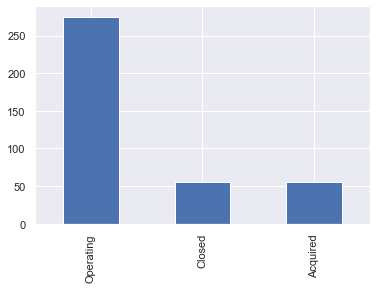

In [109]:
data1["OperatingState"].value_counts().plot(kind='bar')
data1["OperatingState"].value_counts()

<b>• Plot a distribution plot for Funds in million.

<AxesSubplot:xlabel='Funding_million'>

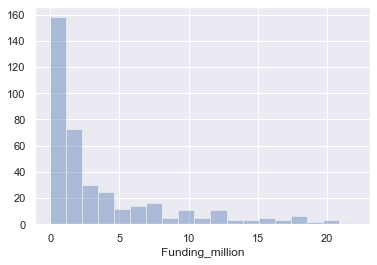

In [111]:
sns.distplot(data1["Funding_million"],kde=False)

<b>• Plot distribution plots for companies still operating and companies that closed.

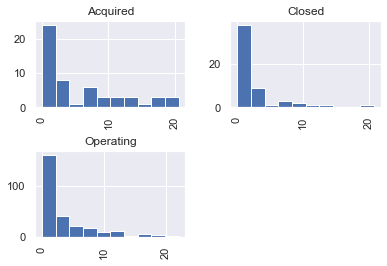

In [114]:
data1.hist(by='OperatingState',column = 'Funding_million')

### 4. Statistical analysis:

<b>• Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?
Write the null hypothesis and alternative hypothesis.
Test for significance and conclusion

Test of Variance

In [138]:
data1[data1["OperatingState"]=="Operating"].shape

(275, 9)

In [139]:
data1[data1["OperatingState"]=="Closed"].shape

(56, 9)

In [148]:
sample_operating = data1[data1["OperatingState"]=="Operating"].Funding_million.sample(n=56) # To make the sample length equal
sample_closed = data1[data1["OperatingState"]=="Closed"].Funding_million

In [149]:
v1, v2 = np.var(sample_operating) , np.var(sample_closed)
print(v1,v2)

18.943869533568236 16.19079137606824


Variances of Funding of Operating is higher than it is for Closed. But is the difference statistically significant?
<br>
Ho : Variation in Funds rasied by operating and closed companies is equal same
<br>
Ha : Variation inin Funds rasied by operating companies greater than it is in closed companies.

In [150]:
n = 56  # number of samples
dof = n - 1  # degrees of freedom
alpha = 0.05  # significance level
chi_critical = 73.31    # critical chi_squared statistic. From the table 

In [151]:
chi = (dof*v1)/v2

if chi < chi_critical:
    print("Since the test statistic is less than the critical value, we fail to reject the null")
else:
    print("Since the test statistic is more than the critical value, we reject the null")

Since the test statistic is less than the critical value, we fail to reject the null


<b>• Make a copy of the original data frame

In [152]:
#Load the dataset
data_copy= pd.read_csv(r"D:\LEARNING\Great Learning\PGP- AI ML\COURSES\APPLIED STATISTICS\PROJECT\DS - Part3 - CompanyX_EU.csv")

<b>• Check frequency distribution of Result variable.

Contestant         488
Finalist            84
Audience choice     41
Winner              26
Runner up           23
Name: Result, dtype: int64

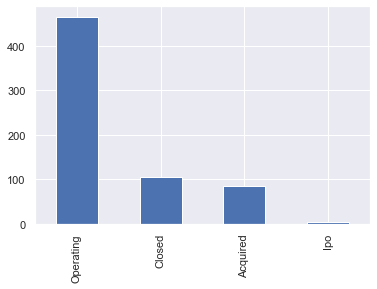

In [156]:
data_copy["OperatingState"].value_counts().plot(kind='bar')

data_copy["Result"].value_counts()

<b>• Calculate percentage of winners that are still operating and percentage of contestants that are still operating

In [192]:
Winners_Operating = data_copy[data_copy['Result'] == 'Winner'].OperatingState.value_counts()[0]
Contestants_Operating = data_copy[data_copy['Result']=='Contestant'].OperatingState.value_counts()[0]
No_Winners = data_copy['Result'].value_counts()[3]
No_Contestants = data_copy['Result'].value_counts()[0]

In [195]:
print([Winners_Operating, Contestants_Operating] , [No_Winners, No_Contestants])
print(f' Percentage of Operating in Winners,Contestants  = {round(19/26,2)}%, {round(332/488,2)}% respectively')

[19, 332] [26, 488]
 Percentage of Operating in Winners,Contestants  = 0.73%, 0.68% respectively


<b>• Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:
 Write the null hypothesis and alternative hypothesis.
 Test for significance and conclusion

#### Ho = The proportions are equal
#### Ha = The two proportions are not equal

In [196]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([Winners_Operating, Contestants_Operating] , [No_Winners, No_Contestants])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.5902 the difference is not significant. aka |We fail to reject the null|


<b>• Check distribution of the Event variable.

TC50 2008                    52
TC50 2009                    50
TC40 2007                    40
Disrupt NYC 2011             32
Disrupt NYC 2013             31
Disrupt SF 2011              31
Disrupt SF 2013              31
Disrupt SF 2012              30
Disrupt NYC 2012             30
Disrupt SF 2014              28
Disrupt SF 2015              27
Disrupt NYC 2014             27
Disrupt SF 2016              26
Disrupt SF 2010              26
Disrupt NY 2015              26
Disrupt NY 2016              22
Disrupt NYC 2010             22
Disrupt Beijing 2011         18
Disrupt London 2015          15
Hardware Battlefield 2015    15
Disrupt EU 2013              15
Disrupt EU 2014              15
Hardware Battlefield 2014    14
Disrupt London 2016          13
Hardware Battlefield 2016    13
-                            13
Name: Event, dtype: int64

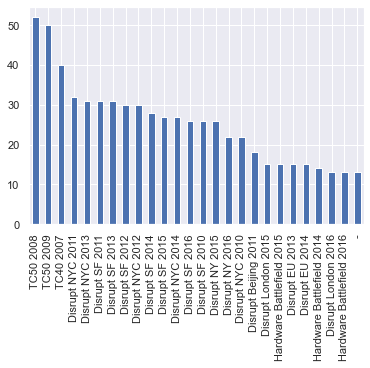

In [200]:
data_copy["Event"].value_counts().plot(kind='bar')
data_copy['Event'].value_counts()

<b>• Select only the Event that has disrupt keyword from 2013 onwards

In [212]:
data_copy[(data_copy["Event"].str.contains("Disrupt", na=False)) &
          (data_copy["Event"].str.contains("2013|2014|2015|2016", na=False))].head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


<b>• Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from
2013 onwards.

#### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean mean funds raised by companies across NY,SF and EU Events respectively.

In [239]:
new_df1 = pd.DataFrame()
new_df1["Funds"] = data1[(data1["Event"].str.contains("NY", na=False)) & (data1["Event"].str.contains("NYC", na=False)==False)&
          (data1["Event"].str.contains("2013|2014|2015|2016", na=False))]["Funding"].reset_index(drop=True)
new_df1["Event"] = 'NY'
new_df1 = new_df1[['Event','Funds']]

In [240]:
new_df2 = pd.DataFrame()
new_df2["Funds"] = data1[(data1["Event"].str.contains("SF", na=False)) &
          (data1["Event"].str.contains("2013|2014|2015|2016", na=False))]["Funding"].reset_index(drop=True)
new_df2["Event"] = 'SF'
new_df2 = new_df2[['Event','Funds']]

In [242]:
new_df3 = pd.DataFrame()
new_df3["Funds"] = data1[(data1["Event"].str.contains("EU", na=False)) &
          (data1["Event"].str.contains("2013|2014|2015|2016", na=False))]["Funding"].reset_index(drop=True)
new_df3["Event"] = 'EU'
new_df3 = new_df3[['Event','Funds']]

In [246]:
new_df = pd.concat([new_df1,new_df2,new_df3],axis=0)

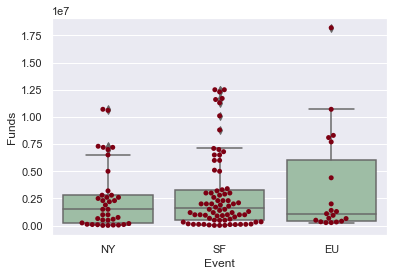

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Event', y='Funds', data=new_df, color='#99c2a2')
ax = sns.swarmplot(x="Event", y="Funds", data=new_df, color='#7d0013')
plt.show()

In [258]:
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Funds ~ C(Event)', data=new_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Event),1.195112e+13,2.0,0.459211,0.632827
Residual,1.652608e+15,127.0,NaN,NaN


The p value obtained from ANOVA analysis is not significant (p > 0.05), and therefore, we conclude that there are no significant differences among treatments.

<b>• Plot the distribution plot comparing the 3 city events.

Disrupt Beijing 2011         18
Disrupt London 2015          15
Hardware Battlefield 2015    15
Hardware Battlefield 2014    14
Disrupt London 2016          13
Hardware Battlefield 2016    13
Name: Event, dtype: int64

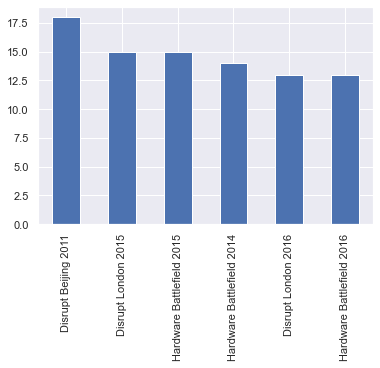

In [272]:
data_copy[data_copy["Event"].str.contains("Beijing|London|Battlefield", na=False)]["Event"].value_counts().plot(kind='bar')
data_copy[data_copy["Event"].str.contains("Beijing|London|Battlefield", na=False)]["Event"].value_counts()

array([[<AxesSubplot:title={'center':'Disrupt Beijing 2011'}>,
        <AxesSubplot:title={'center':'Disrupt London 2015'}>],
       [<AxesSubplot:title={'center':'Disrupt London 2016'}>,
        <AxesSubplot:title={'center':'Hardware Battlefield 2014'}>],
       [<AxesSubplot:title={'center':'Hardware Battlefield 2015'}>,
        <AxesSubplot:title={'center':'Hardware Battlefield 2016'}>]],
      dtype=object)

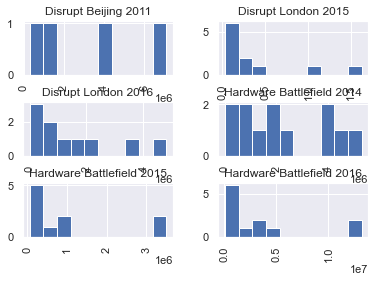

In [278]:
data1[data1["Event"].str.contains("Beijing|London|Battlefield", na=False)][["Event","Funding"]].hist(by=
                                                                                                     'Event',column = 'Funding')

### 5. Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform a better data analysis.

The product column contains the website address. There are missing values in Funding columns.
<br>Capturing the right data is important. 